## Part I: Preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set(style="darkgrid")

In [2]:
%matplotlib inline

In [3]:
orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')

In [4]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [5]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

### Problem 1: Dataset Import & Cleaning

Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [7]:
# change dtypes from object to numeric
orders[['Sales','Profit']].head()

,Sales,Profit
0,$221.98,$62.15
1,"$3,709.40",-$288.77
2,"$5,175.17",$919.97
3,"$2,892.51",-$96.54
4,"$2,832.96",$311.52


In [8]:
orders['Sales'] = pd.to_numeric(orders['Sales'].str.replace('$','').str.replace(',',''))
orders['Profit'] = pd.to_numeric(orders['Profit'].str.replace('$','').str.replace(',',''))

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping.C

### Problem 2: Inventory Management

- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [10]:
orders.head(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [11]:
# change Order Date and Ship Date to proper data type
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [12]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [13]:
orders['Order.Month'] = orders['Order.Date'].map(lambda x: x.month)
orders['Order.Year'] = orders['Order.Date'].map(lambda x: x.year)
orders['Ship.Month'] = orders['Ship.Date'].map(lambda x: x.month)
orders['Ship.Year'] = orders['Ship.Date'].map(lambda x: x.year)

In [14]:
# visualize orders by category
OrdersByCat = pd.DataFrame(orders.groupby(['Order.Year', 'Order.Month', 'Category']).sum())

In [15]:
OrdersByYear = pd.DataFrame(orders.groupby(['Order.Year', 'Order.Month']).sum())

In [16]:
OrdersByYear = OrdersByYear.reset_index()

In [17]:
OrdersByYear.head()

,Order.Year,Order.Month,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Ship.Month,Ship.Year
0,2012,1,12288294,4249606.0,98898.53,1463,68.758,8321.76,10596.7880,482,871196
1,2012,2,11980366,3844568.0,103718.01,1401,58.192,14323.02,12051.3230,939,867172
2,2012,3,13894063,7805920.0,135746.52,1745,74.272,13089.59,12207.4935,1633,1028132
3,2012,4,14688313,7530343.0,114332.99,1934,74.782,13211.11,12631.0520,2220,1084468
4,2012,5,16010056,7031312.0,158228.35,2167,87.472,14644.10,17691.7640,3117,1219272


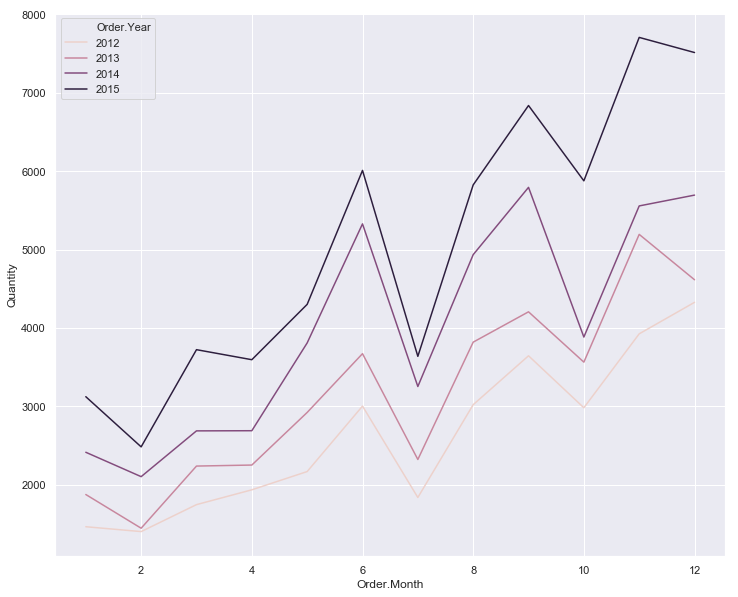

In [18]:
plt.figure(figsize = (12,10))
sns.lineplot(x='Order.Month', y='Quantity',
             hue='Order.Year',
             data=OrdersByYear)

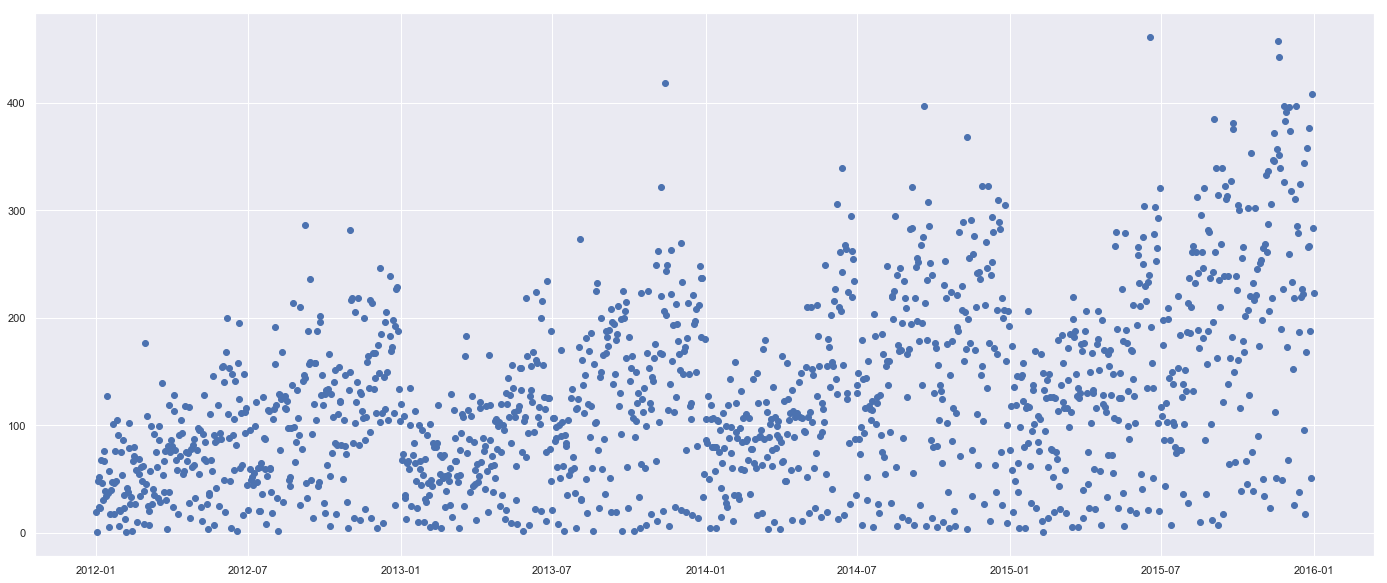

In [19]:
plt.figure(figsize = (24,10))
OrdersByDate = pd.DataFrame(orders.groupby('Order.Date')['Quantity'].sum())
OrdersByDate = OrdersByDate.reset_index()

plt.plot_date(x=OrdersByDate['Order.Date'], y=OrdersByDate['Quantity'])

In [20]:
OrdersByCat = OrdersByCat.reset_index()

In [21]:
OrdersByCat.head()

,Order.Year,Order.Month,Category,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Ship.Month,Ship.Year
0,2012,1,Furniture,2213670,967662.0,34463.74,246,14.140,691.18,3403.293,90,160960
1,2012,1,Office Supplies,8344021,2881733.0,33526.78,997,47.010,4573.73,3743.677,317,575432
2,2012,1,Technology,1730603,400211.0,30908.01,220,7.608,3056.85,3449.818,75,134804
3,2012,2,Furniture,2138019,951858.0,35799.40,278,11.490,3713.39,3994.528,179,162972
4,2012,2,Office Supplies,7382980,2572190.0,26135.09,800,30.750,2829.71,3258.420,540,503000


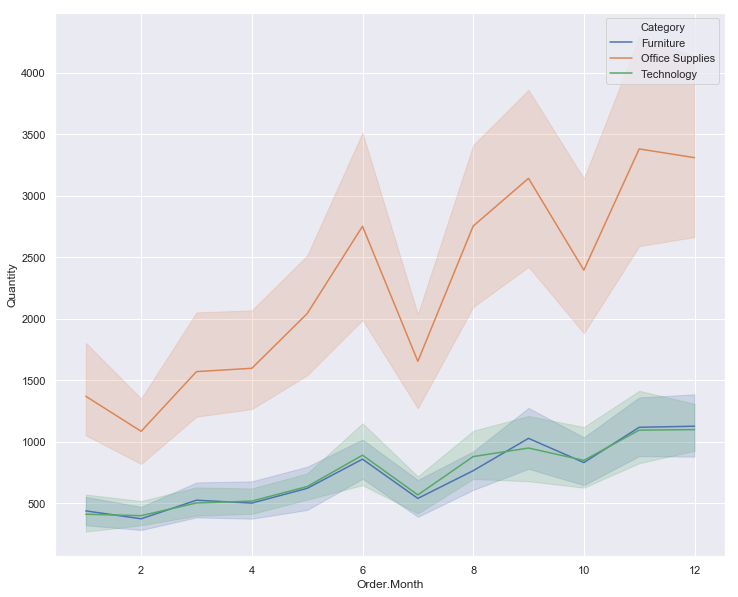

In [22]:
plt.figure(figsize = (12,10))
sns.lineplot(x='Order.Month', y='Quantity',
             hue='Category',
             data=OrdersByCat)

In [23]:
OrdersBySub = pd.DataFrame(orders.groupby(['Category','Sub.Category', 'Order.Month', 'Order.Year'])['Quantity'].agg('sum'))

In [24]:
OrdersBySub.head()

Quantity
Category  Sub.Category Order.Month Order.Year          
Furniture Bookcases    1           2012              74
                                   2013              92
                                   2014             179
                                   2015              82
                       2           2012              49

In [25]:
OrdersBySub = OrdersBySub.reset_index()

In [26]:
OrdersBySub.head()    

,Category,Sub.Category,Order.Month,Order.Year,Quantity
0,Furniture,Bookcases,1,2012,74
1,Furniture,Bookcases,1,2013,92
2,Furniture,Bookcases,1,2014,179
3,Furniture,Bookcases,1,2015,82
4,Furniture,Bookcases,2,2012,49


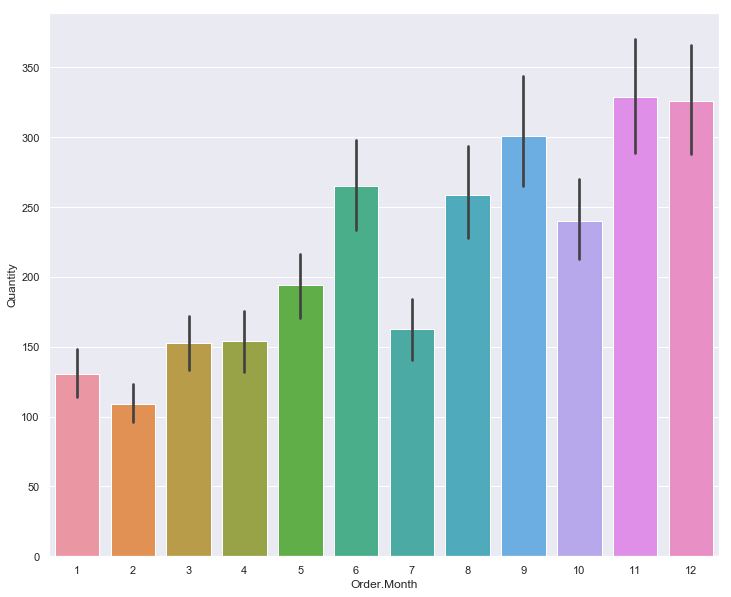

In [27]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='Order.Month', y='Quantity', data=OrdersBySub)

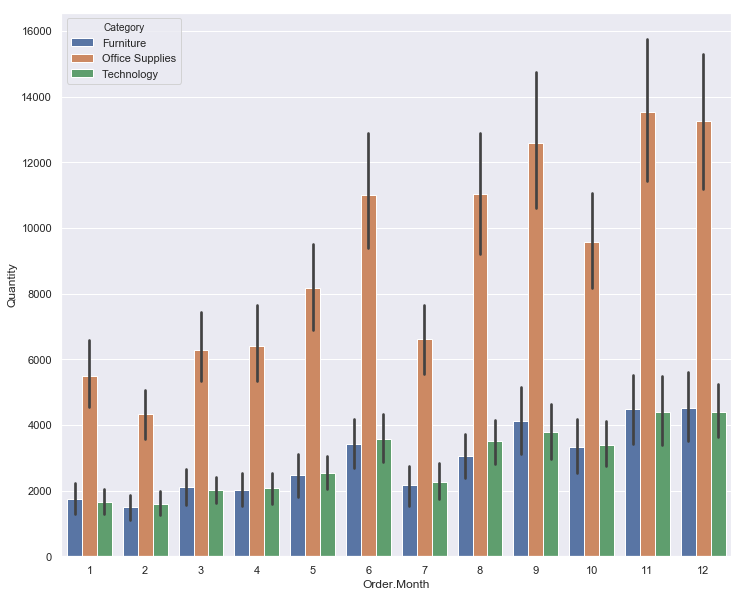

In [28]:
plt.figure(figsize=(12,10))
sns.barplot(x='Order.Month',y='Quantity', hue='Category', data=OrdersBySub, estimator = sum)

In [29]:
OrdersBySub.set_index = OrdersBySub['Order.Month']

In [30]:
yr12 = OrdersBySub[OrdersBySub['Order.Year'] == 2012]
yr13 = OrdersBySub[OrdersBySub['Order.Year'] == 2013]
yr14 = OrdersBySub[OrdersBySub['Order.Year'] == 2014]
yr15 = OrdersBySub[OrdersBySub['Order.Year'] == 2015]

Text(0.5, 1.0, '2015')

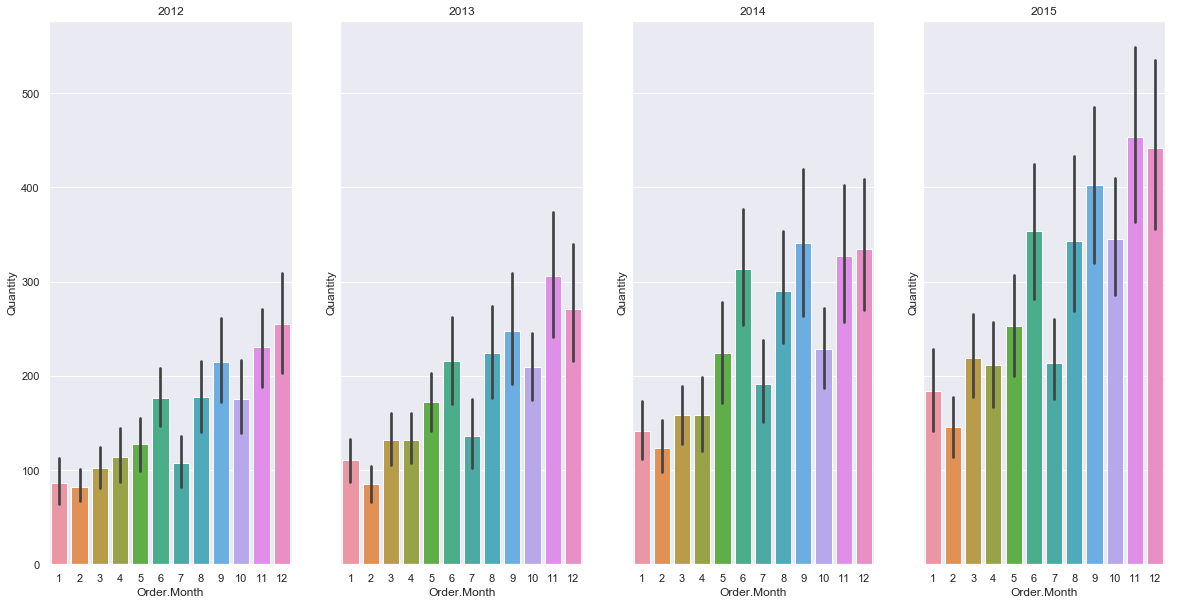

In [31]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20,10))
opacity = 0.8
sns.barplot(data = yr12, x='Order.Month', y='Quantity', ax = axes[0]).set_title('2012')
sns.barplot(data = yr13, x='Order.Month', y='Quantity', ax = axes[1]).set_title('2013')
sns.barplot(data = yr14, x='Order.Month', y='Quantity', ax = axes[2]).set_title('2014')
sns.barplot(data = yr15, x='Order.Month', y='Quantity', ax = axes[3]).set_title('2015')

In [32]:
Sub = OrdersBySub['Sub.Category'].unique()

In [33]:
OrdersBySub.head()

,Category,Sub.Category,Order.Month,Order.Year,Quantity
0,Furniture,Bookcases,1,2012,74
1,Furniture,Bookcases,1,2013,92
2,Furniture,Bookcases,1,2014,179
3,Furniture,Bookcases,1,2015,82
4,Furniture,Bookcases,2,2012,49


In [34]:
len(Sub)

17

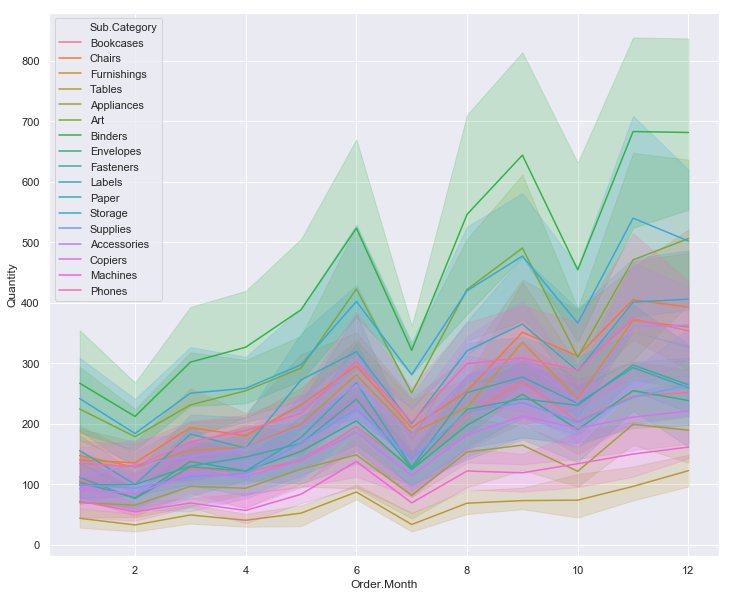

In [35]:
# fig, axes = plt.subplots(6, 3, sharey=True, figsize=(20,10))
# opacity = 0.8

plt.figure(figsize = (12,10))
sns.lineplot(x='Order.Month', y='Quantity',
             hue='Sub.Category',
             data=OrdersBySub)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x720 with 0 Axes>

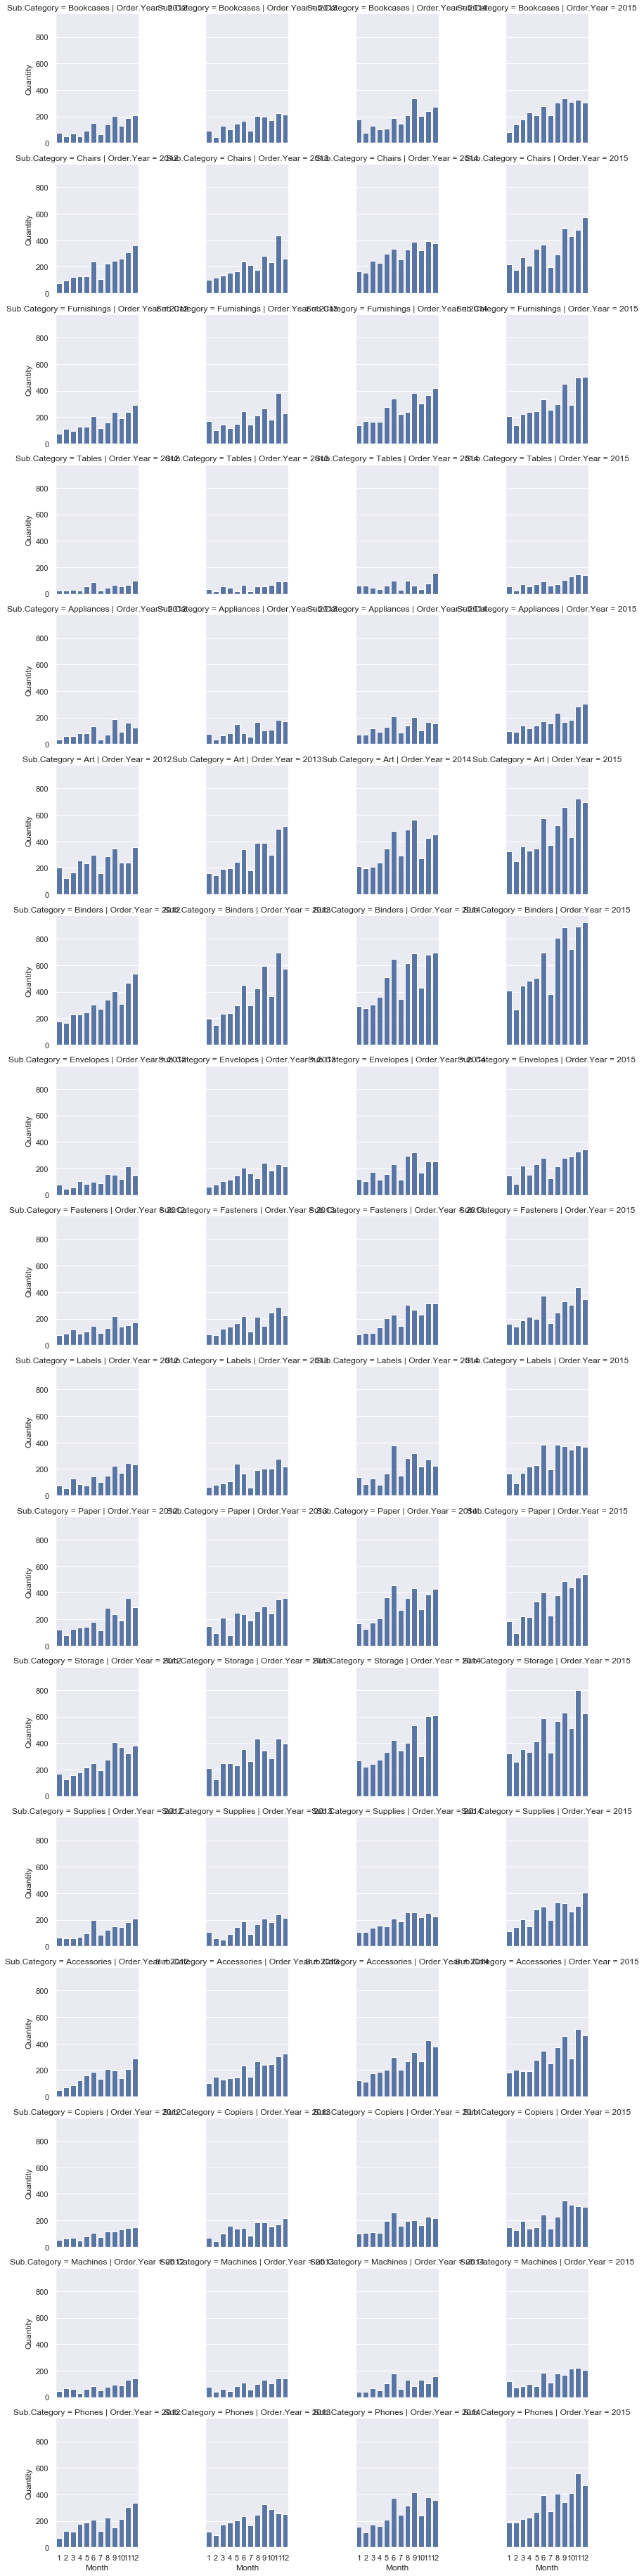

In [36]:
plt.figure(figsize=(20,10))
Grid = sns.FacetGrid(OrdersBySub, col = 'Order.Year', row = 'Sub.Category')
Grid.map(sns.barplot, 'Order.Month', 'Quantity')
Grid.set_axis_labels('Month', 'Quantity')

 1. Is there any seasonal trend of inventory in the company?
     * Yes, number of sales is highest in the last quarter of the year.
 2. Is the seasonal trend the same for different categories?
     * Yes but not so much with Appliances and Tables.

### Additional Exploratory Data Analysis

count    51290.000000
mean       246.490685
std        487.565388
min          0.440000
25%         30.762500
50%         85.055000
75%        251.055000
max      22638.480000
Name: Sales, dtype: float64


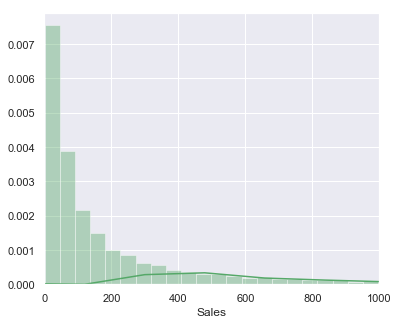

In [39]:
# overview Sales

print(orders['Sales'].describe())

plt.figure(figsize=(6,5))
plt.xlim((0,1000))
sns.distplot(orders['Sales'], color='g',bins=500, hist_kws={'alpha':0.4})

count    51290.000000
mean        28.610970
std        174.341066
min      -6599.980000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.980000
Name: Profit, dtype: float64


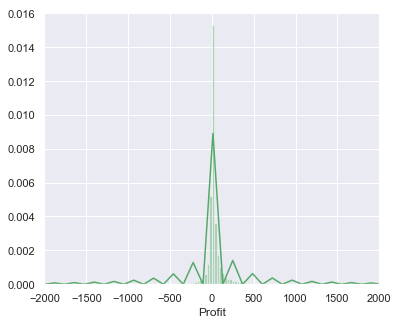

In [40]:
# overview Profit
print(orders['Profit'].describe())

plt.figure(figsize=(6,5))
plt.xlim((-2000,2000))
sns.distplot(orders['Profit'], color='g',bins=500, hist_kws={'alpha':0.4})

In [41]:
OrdersByMonCat= orders.groupby(['Order.Month','Category'])['Quantity'].agg(['mean','count'])

In [42]:
OrdersByMonCat = OrdersByMonCat.reset_index()

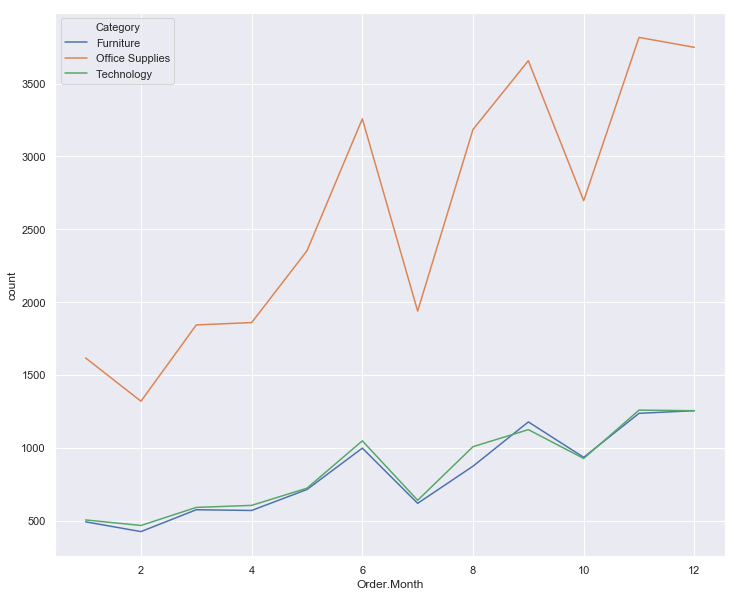

In [43]:
plt.figure(figsize = (12,10))
sns.lineplot(x='Order.Month', y='count',
             hue='Category',
             data=OrdersByMonCat)

In [44]:
OrdersByRegion = pd.DataFrame(orders.groupby(['Order.Year', 'Order.Month', 'Sub.Category', 'Region'])['Quantity'].sum())

In [45]:
OrdersByRegion.head()

Quantity
Order.Year Order.Month Sub.Category Region                   
2012       1           Accessories  Caribbean               2
                                    Central Africa          1
                                    Central America         9
                                    Central US              3
                                    Eastern Africa          1

In [46]:
OrdersByRegion = OrdersByRegion.reset_index()

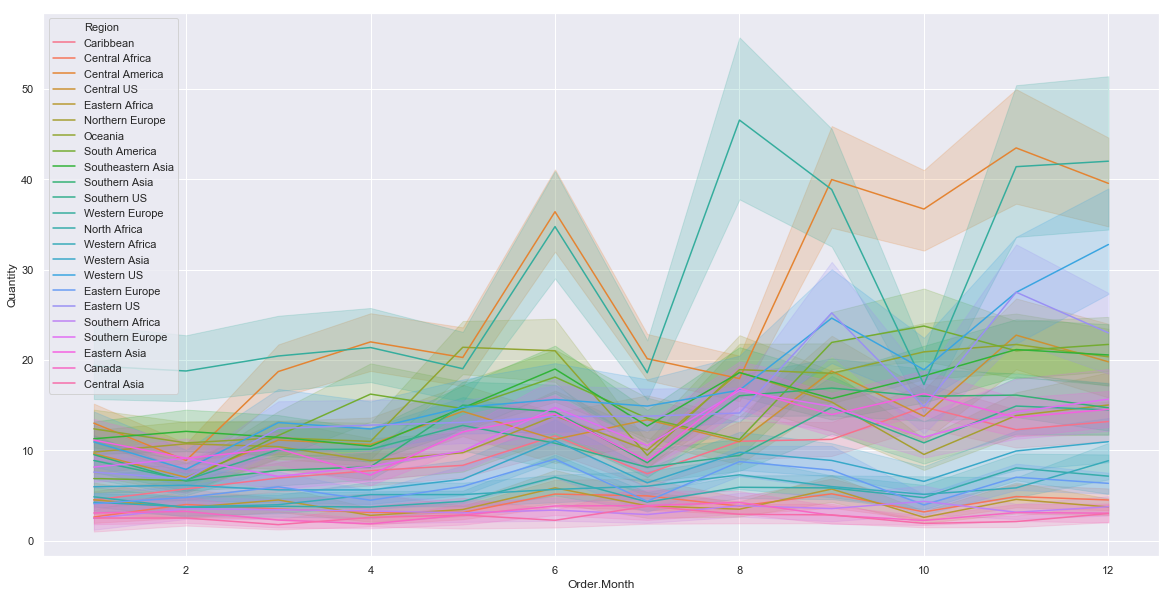

In [47]:
plt.figure(figsize = (20,10))
sns.lineplot(data = OrdersByRegion, x='Order.Month', y='Quantity', hue='Region')

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.
    1. How much profit did we lose due to returns each year?
    2. How many customer returned more than once? more than 5 times?
    3. Which regions are more likely to return orders?
    4. Which categories (sub-categories) of products are more likely to be returned?
    

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


In [48]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [49]:
returns = returns.rename({'Order ID': 'Order.ID'}, axis = 'columns')
returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [50]:
merged = orders.merge(returns, on = 'Order.ID')

In [51]:
merged.head()
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 30 columns):
Row.ID            2220 non-null int64
Order.ID          2220 non-null object
Order.Date        2220 non-null datetime64[ns]
Ship.Date         2220 non-null datetime64[ns]
Ship.Mode         2220 non-null object
Customer.ID       2220 non-null object
Customer.Name     2220 non-null object
Segment           2220 non-null object
Postal.Code       468 non-null float64
City              2220 non-null object
State             2220 non-null object
Country           2220 non-null object
Region_x          2220 non-null object
Market            2220 non-null object
Product.ID        2220 non-null object
Category          2220 non-null object
Sub.Category      2220 non-null object
Product.Name      2220 non-null object
Sales             2220 non-null float64
Quantity          2220 non-null int64
Discount          2220 non-null float64
Profit            2220 non-null float64
Shipping.Cost     

In [52]:
merged['Quantity'].describe()

count    2220.000000
mean        3.457207
std         2.275220
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [53]:
merged['Profit'].describe()

count    2220.000000
mean       27.644482
std       169.304510
min     -1694.590000
25%        -0.002500
50%         8.795000
75%        39.005000
max      4630.480000
Name: Profit, dtype: float64

In [54]:
merged = merged.rename({'Region_y': 'Region'}, axis = 'columns')

####  How much profits did we lose each year?
* 2012: 17477.26
* 2013: 9269.89
* 2014: 17510.63
* 2015: 17112.97

In [55]:
ByYear = merged.groupby('Order.Year')['Profit'].sum().reset_index()

In [56]:
ByYear = ByYear.rename({'Profit': 'Loss'}, axis='columns')

In [57]:
OrdersByYear = orders.groupby('Order.Year')['Profit'].sum().reset_index()

In [58]:
print(OrdersByYear.head())
print(ByYear.head())

   Order.Year     Profit
0        2012  248940.35
1        2013  307415.33
2        2014  406934.89
3        2015  504166.10
   Order.Year      Loss
0        2012  17477.26
1        2013   9269.89
2        2014  17510.63
3        2015  17112.97


In [59]:
NetProfit = OrdersByYear.merge(ByYear, on = 'Order.Year')

In [60]:
NetProfit['Net.Profit'] = NetProfit['Profit'] - NetProfit['Loss']

In [61]:
NetProfit

,Order.Year,Profit,Loss,Net.Profit
0,2012,248940.35,17477.26,231463.09
1,2013,307415.33,9269.89,298145.44
2,2014,406934.89,17510.63,389424.26
3,2015,504166.10,17112.97,487053.13


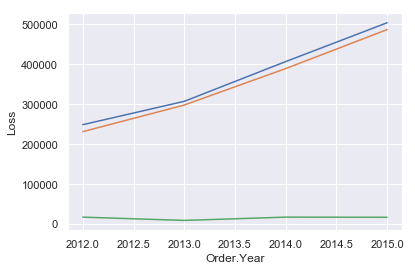

In [62]:
sns.lineplot(data=NetProfit, x='Order.Year', y='Profit')
sns.lineplot(data=NetProfit, x='Order.Year', y='Net.Profit')
sns.lineplot(data=NetProfit, x='Order.Year', y='Loss')

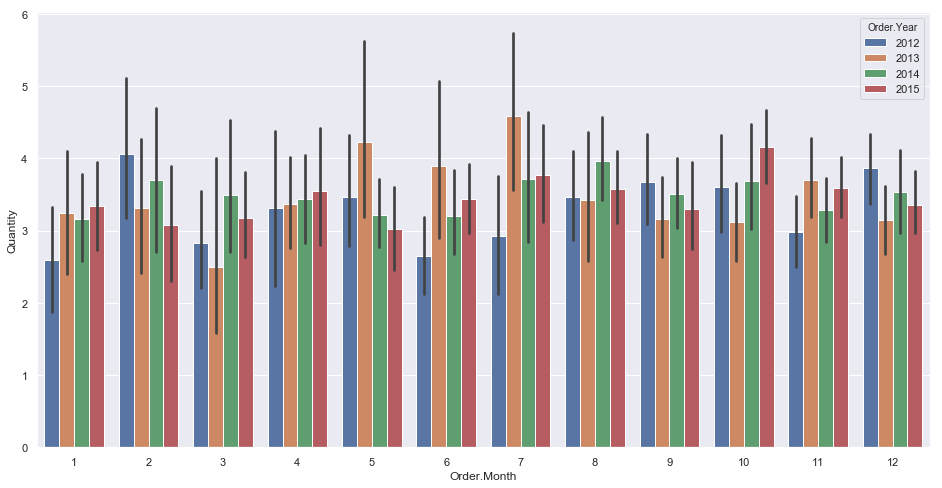

In [64]:
plt.figure(figsize = (16,8))
sns.barplot(data = merged, x = 'Order.Month', y='Quantity', hue = 'Order.Year')

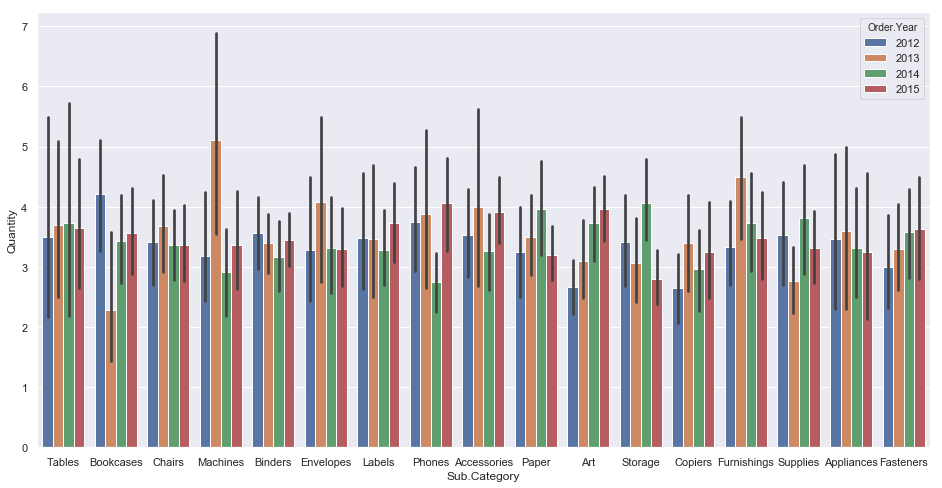

In [65]:
plt.figure(figsize = (16,8))
sns.barplot(data = merged, x = 'Sub.Category', y='Quantity', hue = 'Order.Year')

In [66]:
ByRegion = merged.groupby('Region').sum()
ByRegion  = ByRegion.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

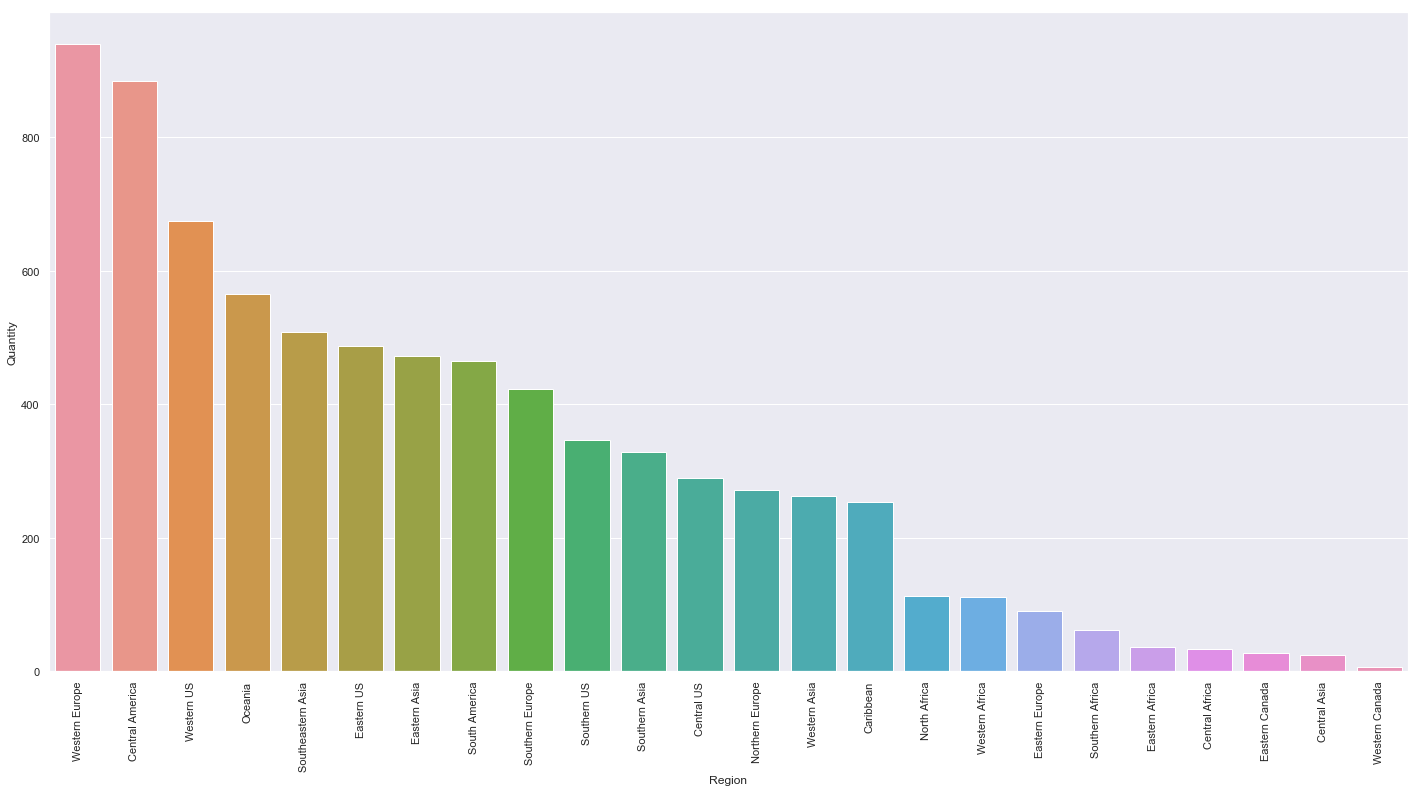

In [67]:
plt.figure(figsize = (20,10))
sns.barplot(data = ByRegion.sort_values(by='Quantity', ascending=False), x='Region', y='Quantity')
plt.tight_layout()
plt.xticks(rotation = 90)

In [68]:
CustRet = merged['Customer.ID'].value_counts()

In [69]:
Names = merged['Customer.Name'].value_counts()

In [70]:
CustRet = CustRet.reset_index()

In [71]:
CustRet = CustRet.rename({'index':'Customer.ID', 'Customer.ID': 'Returns'}, axis='columns')

In [72]:
CustRet.head()

,Customer.ID,Returns
0,PO-1885082,13
1,JK-1609027,11
2,MY-1829582,10
3,TB-2140066,10
4,SG-200801404,9


In [73]:
Names = Names.reset_index().rename({'index':'Customer.Name', 'Customer.Name':'Count'}, axis='columns')

In [74]:
Names.head()

,Customer.Name,Count
0,Patrick O'Brill,21
1,Jeremy Pistek,20
2,Muhammed Yedwab,17
3,Tom Boeckenhauer,17
4,Anne McFarland,15


In [75]:
Names[Names['Count'] >= 5].count()

Customer.Name    176
Count            176
dtype: int64

In [76]:
Names[Names['Count'] > 1].count()

Customer.Name    448
Count            448
dtype: int64

In [77]:
# Top Ten returnees
Names[:10]

,Customer.Name,Count
0,Patrick O'Brill,21
1,Jeremy Pistek,20
2,Muhammed Yedwab,17
3,Tom Boeckenhauer,17
4,Anne McFarland,15
5,Greg Tran,15
6,Ben Ferrer,14
7,Daniel Lacy,14
8,Juliana Krohn,14
9,Julie Creighton,13


In [78]:
ByCat = merged.groupby('Sub.Category')['Quantity'].sum()
ByCat = ByCat.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

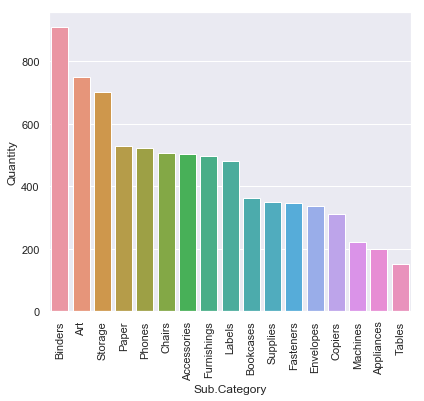

In [80]:
plt.figure(figsize  = (6,5))
sns.barplot(data = ByCat.sort_values(by='Quantity', ascending=False), x='Sub.Category', y='Quantity')
plt.tight_layout()
plt.xticks(rotation = 90)

In [81]:
NetProfit

,Order.Year,Profit,Loss,Net.Profit
0,2012,248940.35,17477.26,231463.09
1,2013,307415.33,9269.89,298145.44
2,2014,406934.89,17510.63,389424.26
3,2015,504166.10,17112.97,487053.13


1. How much profit did we lose due to returns each year?
    * 2012: 17,447.26
    * 2013: 9,269.89
    * 2014: 17,510.63
    * 2015: 17,112.97
2. How many customer returned more than once? more than 5 times?
    * Once: 448
    * More than 5: 176
3. Which regions are more likely to return orders?
    * Western Europe, Central America, Oceania, Western US, Southeastern Asia
4. Which categories (sub-categories) of products are more likely to be returned?
    * Binders, Art, Storage, Paper, Phones (Top 5)

## Part II: Machine Learning and Business Use Case

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [82]:
returns = returns.rename({'Order ID': 'Order.ID'}, axis = 'columns')

In [83]:
returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [89]:
joined = orders.join(returns, lsuffix='Order.ID', rsuffix='Order.ID')

In [90]:
joined['Returned'] = joined['Returned'].fillna('No')

In [91]:
joined.head()

,Row.ID,Order.IDOrder.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Ship.Month,Ship.Year,Returned,Order.IDOrder.ID,RegionOrder.ID
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,40.77,High,11,2014,11,2014,Yes,CA-2012-SA20830140-41210,Central US
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,923.63,Critical,2,2014,2,2014,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,915.49,Medium,10,2014,10,2014,Yes,CA-2012-SC20095140-41174,Central US
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-96.54,910.16,Medium,1,2014,1,2014,Yes,IN-2015-JH158207-42140,Oceania
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,311.52,903.04,Critical,11,2014,11,2014,Yes,IN-2014-LC168857-41747,Oceania


In [95]:
joined.columns = ['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID',
       'Category', 'Sub.Category', 'Product.Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Ship.Month', 'Ship.Year', 'Returned', 'Order.ID2',
       'Region2']

In [96]:
joined.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Ship.Month,Ship.Year,Returned,Order.ID2,Region2
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,40.77,High,11,2014,11,2014,Yes,CA-2012-SA20830140-41210,Central US
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,923.63,Critical,2,2014,2,2014,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,915.49,Medium,10,2014,10,2014,Yes,CA-2012-SC20095140-41174,Central US
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-96.54,910.16,Medium,1,2014,1,2014,Yes,IN-2015-JH158207-42140,Oceania
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,311.52,903.04,Critical,11,2014,11,2014,Yes,IN-2014-LC168857-41747,Oceania


In [101]:
# Drop duplicated columns]
joined = joined.drop(columns=['Order.ID2', 'Region2'])

In [103]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 29 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null datetime64[ns]
Ship.Date         51290 non-null datetime64[ns]
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [104]:
joined['Process.Time']  = joined['Ship.Date'] - joined['Order.Date']

In [226]:
joined['Process.Time'] = joined['Process.Time'].dt.days

In [227]:
joined.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Ship.Month,Ship.Year,Returned,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,11,2014,11,2014,Yes,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.77,923.63,Critical,2,2014,2,2014,Yes,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0.1,919.97,915.49,Medium,10,2014,10,2014,Yes,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0.1,-96.54,910.16,Medium,1,2014,1,2014,Yes,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0.0,311.52,903.04,Critical,11,2014,11,2014,Yes,1


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [228]:
# Number of Returns
NumReturns = pd.DataFrame(joined.groupby('Product.ID')['Returned'].count())
NumReturns = NumReturns.reset_index()

In [229]:
NumReturns.head()

,Product.ID,Returned
0,FUR-BO-3174,2
1,FUR-BO-3175,8
2,FUR-BO-3176,6
3,FUR-BO-3177,8
4,FUR-BO-3409,8


In [230]:
returned = joined.join(NumReturns, lsuffix='Product.ID')

In [231]:
returned.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Ship.Month,Ship.Year,ReturnedProduct.ID,Process.Time,Product.ID,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,40.77,High,11,2014,11,2014,Yes,2,FUR-BO-3174,2.0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,923.63,Critical,2,2014,2,2014,Yes,2,FUR-BO-3175,8.0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,915.49,Medium,10,2014,10,2014,Yes,1,FUR-BO-3176,6.0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,910.16,Medium,1,2014,1,2014,Yes,2,FUR-BO-3177,8.0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,903.04,Critical,11,2014,11,2014,Yes,1,FUR-BO-3409,8.0


In [234]:
returned = returned.drop('Product.ID', axis = 1)

In [240]:
returned.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.IDProduct.ID',
       'Category', 'Sub.Category', 'Product.Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Ship.Month', 'Ship.Year', 'ReturnedProduct.ID',
       'Process.Time', 'Returned'],
      dtype='object')

In [241]:
returned = returned.rename({'Product.IDProduct.ID': 'Product.ID', 'ReturnedProduct.ID': 'Returned', 'Returned': 'Num.Returns'}, axis = 1)

In [242]:
returned.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Ship.Month', 'Ship.Year', 'Returned', 'Process.Time',
       'Num.Returns'],
      dtype='object')

Row.ID                                     13524
Order.ID                 ES-2014-KM1637548-41667
Order.Date                   2014-01-28 00:00:00
Ship.Date                    2014-01-30 00:00:00
Ship.Mode                            First Class
Customer.ID                           KM-1637548
Customer.Name                   Katherine Murray
Segment                              Home Office
Postal.Code                                  NaN
City                                      Berlin
State                                     Berlin
Country                                  Germany
Region                            Western Europe
Market                                    Europe
Product.ID                           TEC-PH-5267
Category                              Technology
Sub.Category                              Phones
Product.Name      Motorola Smart Phone, Cordless
Sales                                    2892.51
Quantity                                       5
Discount            

### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

In [245]:
returned.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Ship.Month', 'Ship.Year', 'Returned', 'Process.Time',
       'Num.Returns'],
      dtype='object')

In [265]:
final = returned[['Ship.Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit', 
'Shipping.Cost', 'Order.Priority', 'Order.Month', 'Returned', 'Process.Time', 'Num.Returns']]

In [266]:
final.head()

,Ship.Mode,Segment,Region,Market,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Num.Returns
0,First Class,Consumer,Central US,USCA,Technology,Phones,221.98,2,0.0,62.15,40.77,High,11,Yes,2,2.0
1,Second Class,Corporate,Oceania,Asia Pacific,Furniture,Chairs,3709.40,9,0.1,-288.77,923.63,Critical,2,Yes,2,8.0
2,First Class,Consumer,Oceania,Asia Pacific,Technology,Phones,5175.17,9,0.1,919.97,915.49,Medium,10,Yes,1,6.0
3,First Class,Home Office,Western Europe,Europe,Technology,Phones,2892.51,5,0.1,-96.54,910.16,Medium,1,Yes,2,8.0
4,Same Day,Consumer,Western Africa,Africa,Technology,Copiers,2832.96,8,0.0,311.52,903.04,Critical,11,Yes,1,8.0


In [177]:
categorical = ['Segment', 'Market', 'Category', 'Sub.Category'] # 8

# 'City', 'State', 'Country', 'Region'

quantitative = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping.Cost', 'Process.Time'] # 6

ordinalcat = ['Ship.Mode', 'Order.Priority', 'Order.Date', 'Ship.Date', 'Order.Month', 'Order.Year', 
              'Ship.Month', 'Ship.Year'] # 6

ordinal = ['Ship.Mode', 'Order.Priority']

In [178]:
for feature in categorical:
    print(X[feature].value_counts())
    print('')

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub.Category, dtype: int64



In [267]:
# categorial features to dummify
dummyList = ['Ship.Mode', 'Segment', 'Region', 'Market', 'Sub.Category', 'Order.Priority', 'Order.Month']

In [ ]:
# dummify nominal values

In [271]:
def ReplaceWithDummies(df, dummylist):
    df2 = df.copy()
    for var in dummylist:
        topindex = df2[var].value_counts().sort_values(ascending=False).index[0]
        dummies = pd.get_dummies(df2[var], prefix=var)
        dummies = dummies.drop(var + "_" + str(topindex), axis=1)
        df2 = pd.concat([df2, dummies], axis=1)
        df2 = df2.drop(var, axis=1)
    return df2

In [276]:
dfFinal = ReplaceWithDummies(final, dummyList)

In [278]:
dfFinal['Num.Returns'] = dfFinal['Num.Returns'].fillna(0)

In [281]:
dfFinal['Returned'] = dfFinal['Returned'].replace({'Yes': 1, 'No': 0})

In [283]:
dfFinal = dfFinal.drop('Category', axis = 1)

In [284]:
dfFinal.head()

,Sales,Quantity,Discount,Profit,Shipping.Cost,Returned,Process.Time,Num.Returns,Ship.Mode_First Class,Ship.Mode_Same Day,...,Order.Month_2,Order.Month_3,Order.Month_4,Order.Month_5,Order.Month_6,Order.Month_7,Order.Month_8,Order.Month_9,Order.Month_10,Order.Month_12
0,221.98,2,0.0,62.15,40.77,1,2,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3709.40,9,0.1,-288.77,923.63,1,2,8.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5175.17,9,0.1,919.97,915.49,1,1,6.0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2892.51,5,0.1,-96.54,910.16,1,2,8.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2832.96,8,0.0,311.52,903.04,1,1,8.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [285]:
X = dfFinal.drop('Returned', axis = 1)
y = dfFinal['Returned']

In [287]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [288]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

In [289]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

array([[9518,  524],
       [  15,  201]])

In [290]:
roc_auc_score(y_test, y_predict)

0.9391873575427647

In [298]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [299]:
confusion_matrix(y_test, y_predict)

array([[9944,   98],
       [   1,  215]])

In [300]:
roc_auc_score(y_test, y_predict)

0.9928056791106978

In [313]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9, splitter='best')
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)

In [314]:
confusion_matrix(y_test, y_predict)

array([[9957,   85],
       [   4,  212]])

In [315]:
roc_auc_score(y_test, y_predict)

0.9865085160842977

In [316]:
classification_report(y_true = y_test, y_pred=y_predict)

'             precision    recall  f1-score   support\n\n          0       1.00      0.99      1.00     10042\n          1       0.71      0.98      0.83       216\n\navg / total       0.99      0.99      0.99     10258\n'

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.